In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
file_path = "./Resources/GlobalLandTemperaturesByState.csv"
global_temp_df = pd.read_csv(file_path)
global_temp_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [3]:
# cast to to datetime
dt= lambda df_: pd.to_datetime(df_['dt'])

In [4]:
# Extract average Temp across the world since the begining of the 1990
global_temp_df = global_temp_df.loc[(global_temp_df['dt'] >= '1990-01-01')]
global_temp_df


,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
1616,1990-01-01,25.881,0.297,Acre,Brazil
1617,1990-02-01,26.115,0.687,Acre,Brazil
1618,1990-03-01,26.323,0.339,Acre,Brazil
1619,1990-04-01,25.866,0.634,Acre,Brazil
1620,1990-05-01,25.832,0.687,Acre,Brazil
...,...,...,...,...,...
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China
645673,2013-08-01,29.202,0.869,Zhejiang,China


In [5]:
# drop the null values
cleanglobal_temp_df = global_temp_df.dropna()
cleanglobal_temp_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
1616,1990-01-01,25.881,0.297,Acre,Brazil
1617,1990-02-01,26.115,0.687,Acre,Brazil
1618,1990-03-01,26.323,0.339,Acre,Brazil
1619,1990-04-01,25.866,0.634,Acre,Brazil
1620,1990-05-01,25.832,0.687,Acre,Brazil


In [6]:
# Make a copy of the data for future use
copy = cleanglobal_temp_df.copy()
# check the unique coloumn
cleanglobal_temp_df.nunique()


dt                                 285
AverageTemperature               40362
AverageTemperatureUncertainty     1338
State                              241
Country                              7
dtype: int64

In [7]:
cleanglobal_temp_df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [8]:
cleanglobal_temp_df.notnull().sum()


dt                               68504
AverageTemperature               68504
AverageTemperatureUncertainty    68504
State                            68504
Country                          68504
dtype: int64

In [9]:
# Recode the Columns
cleanglobal_temp_df = cleanglobal_temp_df.rename(columns={"dt":"Date",
                                                  "AverageTemperature":"Avg_temp",
                                                  "AverageTemperatureUncertainty":"Avg_temp_Uncer",
                                                  "State":"State",
                                                  "Country":"Country"})
cleanglobal_temp_df


,Date,Avg_temp,Avg_temp_Uncer,State,Country
1616,1990-01-01,25.881,0.297,Acre,Brazil
1617,1990-02-01,26.115,0.687,Acre,Brazil
1618,1990-03-01,26.323,0.339,Acre,Brazil
1619,1990-04-01,25.866,0.634,Acre,Brazil
1620,1990-05-01,25.832,0.687,Acre,Brazil
...,...,...,...,...,...
645669,2013-04-01,15.710,0.461,Zhejiang,China
645670,2013-05-01,21.634,0.578,Zhejiang,China
645671,2013-06-01,24.679,0.596,Zhejiang,China
645672,2013-07-01,29.272,1.340,Zhejiang,China


In [10]:
# Format the columns.
cleanglobal_temp_df["Avg_temp"] = cleanglobal_temp_df["Avg_temp"].map("{:.2f}".format)
cleanglobal_temp_df["Avg_temp_Uncer"] = cleanglobal_temp_df["Avg_temp_Uncer"].map("{:.2f}".format)
cleanglobal_temp_df

,Date,Avg_temp,Avg_temp_Uncer,State,Country
1616,1990-01-01,25.88,0.30,Acre,Brazil
1617,1990-02-01,26.11,0.69,Acre,Brazil
1618,1990-03-01,26.32,0.34,Acre,Brazil
1619,1990-04-01,25.87,0.63,Acre,Brazil
1620,1990-05-01,25.83,0.69,Acre,Brazil
...,...,...,...,...,...
645669,2013-04-01,15.71,0.46,Zhejiang,China
645670,2013-05-01,21.63,0.58,Zhejiang,China
645671,2013-06-01,24.68,0.60,Zhejiang,China
645672,2013-07-01,29.27,1.34,Zhejiang,China


In [11]:
cleanglobal_temp_df.reset_index(drop=True,inplace= True)
cleanglobal_temp_df

,Date,Avg_temp,Avg_temp_Uncer,State,Country
0,1990-01-01,25.88,0.30,Acre,Brazil
1,1990-02-01,26.11,0.69,Acre,Brazil
2,1990-03-01,26.32,0.34,Acre,Brazil
3,1990-04-01,25.87,0.63,Acre,Brazil
4,1990-05-01,25.83,0.69,Acre,Brazil
...,...,...,...,...,...
68499,2013-04-01,15.71,0.46,Zhejiang,China
68500,2013-05-01,21.63,0.58,Zhejiang,China
68501,2013-06-01,24.68,0.60,Zhejiang,China
68502,2013-07-01,29.27,1.34,Zhejiang,China


In [12]:

copy['Date'] = pd.to_datetime(copy.dt)
copy['Year'] = copy['Date'].dt.year
Global_temp =copy.reset_index()

In [13]:
Global_temp

,index,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,Date,Year
0,1616,1990-01-01,25.881,0.297,Acre,Brazil,1990-01-01,1990
1,1617,1990-02-01,26.115,0.687,Acre,Brazil,1990-02-01,1990
2,1618,1990-03-01,26.323,0.339,Acre,Brazil,1990-03-01,1990
3,1619,1990-04-01,25.866,0.634,Acre,Brazil,1990-04-01,1990
4,1620,1990-05-01,25.832,0.687,Acre,Brazil,1990-05-01,1990
...,...,...,...,...,...,...,...,...
68499,645669,2013-04-01,15.710,0.461,Zhejiang,China,2013-04-01,2013
68500,645670,2013-05-01,21.634,0.578,Zhejiang,China,2013-05-01,2013
68501,645671,2013-06-01,24.679,0.596,Zhejiang,China,2013-06-01,2013
68502,645672,2013-07-01,29.272,1.340,Zhejiang,China,2013-07-01,2013


In [14]:
Global_temp.drop(columns = ['dt'], axis = 1, inplace = True)
Global_temp

,index,AverageTemperature,AverageTemperatureUncertainty,State,Country,Date,Year
0,1616,25.881,0.297,Acre,Brazil,1990-01-01,1990
1,1617,26.115,0.687,Acre,Brazil,1990-02-01,1990
2,1618,26.323,0.339,Acre,Brazil,1990-03-01,1990
3,1619,25.866,0.634,Acre,Brazil,1990-04-01,1990
4,1620,25.832,0.687,Acre,Brazil,1990-05-01,1990
...,...,...,...,...,...,...,...
68499,645669,15.710,0.461,Zhejiang,China,2013-04-01,2013
68500,645670,21.634,0.578,Zhejiang,China,2013-05-01,2013
68501,645671,24.679,0.596,Zhejiang,China,2013-06-01,2013
68502,645672,29.272,1.340,Zhejiang,China,2013-07-01,2013


In [15]:
Global_temp.drop(columns = ['index'], axis = 1, inplace = True)
Global_temp

,AverageTemperature,AverageTemperatureUncertainty,State,Country,Date,Year
0,25.881,0.297,Acre,Brazil,1990-01-01,1990
1,26.115,0.687,Acre,Brazil,1990-02-01,1990
2,26.323,0.339,Acre,Brazil,1990-03-01,1990
3,25.866,0.634,Acre,Brazil,1990-04-01,1990
4,25.832,0.687,Acre,Brazil,1990-05-01,1990
...,...,...,...,...,...,...
68499,15.710,0.461,Zhejiang,China,2013-04-01,2013
68500,21.634,0.578,Zhejiang,China,2013-05-01,2013
68501,24.679,0.596,Zhejiang,China,2013-06-01,2013
68502,29.272,1.340,Zhejiang,China,2013-07-01,2013


In [16]:
# Save in the Resources
Global_temp.to_csv(index=True)
filepath = Path('Resources/Global_temp.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
Global_temp.to_csv(filepath)


In [17]:
Global_temp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AverageTemperature,68504.0,10.495880,13.668517,-43.002,1.37575,12.7755,21.481,36.339
AverageTemperatureUncertainty,68504.0,0.302915,0.174519,0.044,0.20400,0.2640,0.349,5.435
Year,68504.0,2001.348242,6.839695,1990.000,1995.00000,2001.0000,2007.000,2013.000


In [18]:
world_temp_byCountry = Global_temp.groupby(by='Country')[['AverageTemperature',
                                             'AverageTemperatureUncertainty']].agg(lambda x: x.astype(float).mean())


In [19]:
world_temp_byCountry

,AverageTemperature,AverageTemperatureUncertainty
Country,,
Australia,18.488940,0.218123
Brazil,24.649577,0.372301
Canada,-0.504399,0.325735
China,12.322680,0.262353
India,22.934573,0.364369
Russia,2.655988,0.334668
United States,11.672875,0.217623


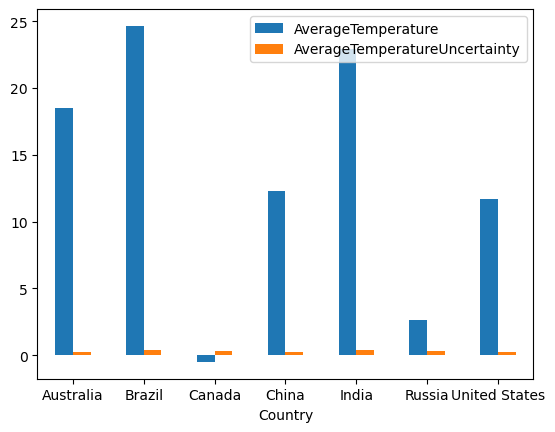

In [20]:
# Create the bar plot.
ax =world_temp_byCountry.plot.bar (rot=0)

In [21]:
world_temp_by_year = Global_temp.groupby(by='Year')[['AverageTemperature',
                                             'AverageTemperatureUncertainty']].agg(lambda x: x.astype(float).mean())
world_temp_by_year.tail(20)

,AverageTemperature,AverageTemperatureUncertainty
Year,,
1994,10.067471,0.285815
1995,10.656668,0.271568
1996,9.818723,0.276961
1997,10.064026,0.294617
1998,10.592179,0.274582
1999,10.637408,0.277948
2000,10.426971,0.291344
2001,10.557589,0.288960
2002,10.641713,0.290701


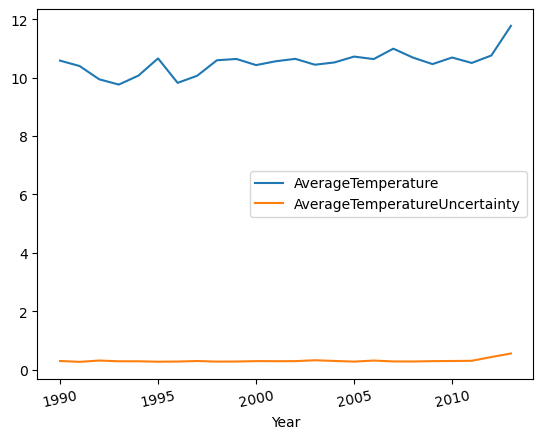

In [22]:
# Create the bar plot.
ax =world_temp_by_year.plot.line (rot=12)